In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.stats import dirichlet, norm

In [2]:
data_path = "../data/data_ex6.npy"
# data = np.load(data_path)
data = np.loadtxt(data_path)
data.shape

(1000,)

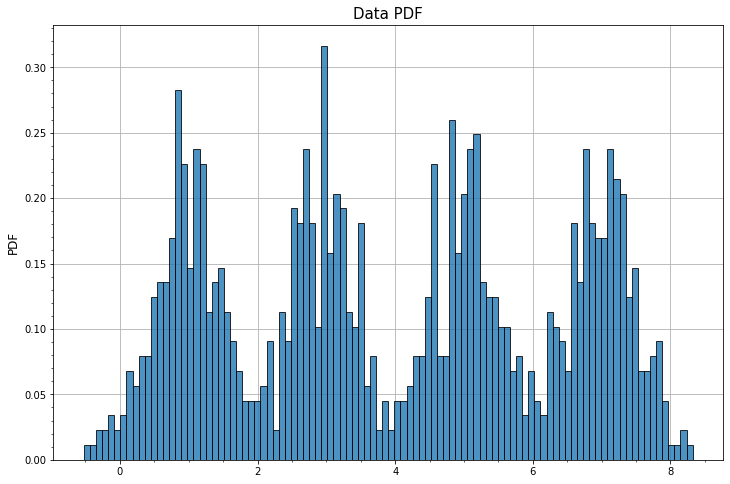

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.hist(data, bins=100, density=True, alpha = 0.8, edgecolor='black', zorder = 2)
ax.grid(zorder = 1)
ax.minorticks_on()
ax.set_title('Data PDF', fontsize = 15)
ax.set_ylabel('PDF', fontsize = 12)
plt.show()

In [4]:
k = 4       #number of clusters
sigma = 0.5 #standard deviation of the gaussians

In [43]:
# useful functions

def N_k(array):
    """the input will be the latent Z_i"""

    N_k = [] #list containint k=4 elements. Each element represents the number of x assigned to each cluster

    for i in range(k):
        N_k.append(np.sum(array==i))        

    return np.array(N_k)

def m_k(array, x):
    """the input will be the latent Z_i and the data points x_i"""
    m_k = np.zeros(k)

    for i in range(k):
        index  = np.where(array==i)
        m_k[i] = np.sum(x[index]) # sum the x_i which are in the same cluster k

    return np.array(m_k)

In [58]:
# define the function which sample the latent variables and the parameters to infere
mu_0 = 0; sigma_0 = 1000; gamma_k = np.ones(k)

def sample_mu_k(Z_i):

    mu_k_prime = ( (mu_0/sigma_0**2) + ( (m_k(Z_i, data)) / sigma**2 ) ) / ( (1/sigma_0**2) + (N_k(Z_i)/sigma**2) )
    sigma_k_prime = 1/ np.sqrt( (1/sigma_0**2) + (N_k(Z_i)/sigma**2) )

    #generate froma a normal distribution

    mu_k = np.random.normal(mu_k_prime, sigma_k_prime)

    return mu_k

def sample_p_k(Z_i):
    
    gamma_k_prime = gamma_k + N_k(Z_i)

    p_k = np.random.dirichlet(gamma_k_prime)

    return p_k

def sample_Z_i(data, p_k, mu_k):
    
    Z_i_new = np.zeros(len(data))
    prob_Z  = np.zeros((len(data), k))

    for x in range(len(data)):

        p = p_k * np.exp( - ( (data[x] - mu_k)**2 ) / (2*sigma**2)) #vector of k=4 comp.

        prob_Z[x] = p / ( np.sum(p) )

        Z_i_new[x] = np.random.choice( np.arange(k),p=prob_Z[x])


    return Z_i_new


In [59]:
a = np.array([20,50,10,100])
b = np.array([1,1,1,1])
sn = dirichlet(a)
print(sn.rvs())

np.random.dirichlet(a)

[[0.11439272 0.24905564 0.05899734 0.5775543 ]]


array([0.11044913, 0.3009256 , 0.05448254, 0.53414273])

In [60]:
# initialize the parameters

p_k  = np.random.uniform(0,1,k)
p_k  = p_k / np.sum(p_k)
mu_k = np.random.uniform(np.min(data)+1, np.max(data)-1, k) #deve essere uno di questi

Z_i = np.random.randint(0, k, len(data))

# track the parameters value
p_k_list  = []
mu_k_list = []
Z_i_list  = []

p_k_list.append(p_k)
mu_k_list.append(mu_k)
Z_i_list.append(Z_i)

maxiter = 100

for i in range(maxiter):

    mu_k_propose = sample_mu_k(Z_i_list[i])
    p_k_propose  = sample_p_k (Z_i_list[i])
    Z_i_propose  = sample_Z_i (data, p_k = p_k_list[i], mu_k = mu_k_list[i])

    p_k_list.append(p_k_propose)
    mu_k_list.append(mu_k_propose)
    Z_i_list.append(Z_i_propose)

In [61]:
p_k_list[-1]

array([0.27374932, 0.25818766, 0.23613211, 0.23193091])

In [62]:
from functools import reduce

mu_k_list = reduce(lambda x, y: np.vstack([x,y]), mu_k_list)
p_k_list = reduce(lambda x, y: np.vstack([x,y]), p_k_list)
Z_i_list = reduce(lambda x, y: np.vstack([x,y]), Z_i_list)

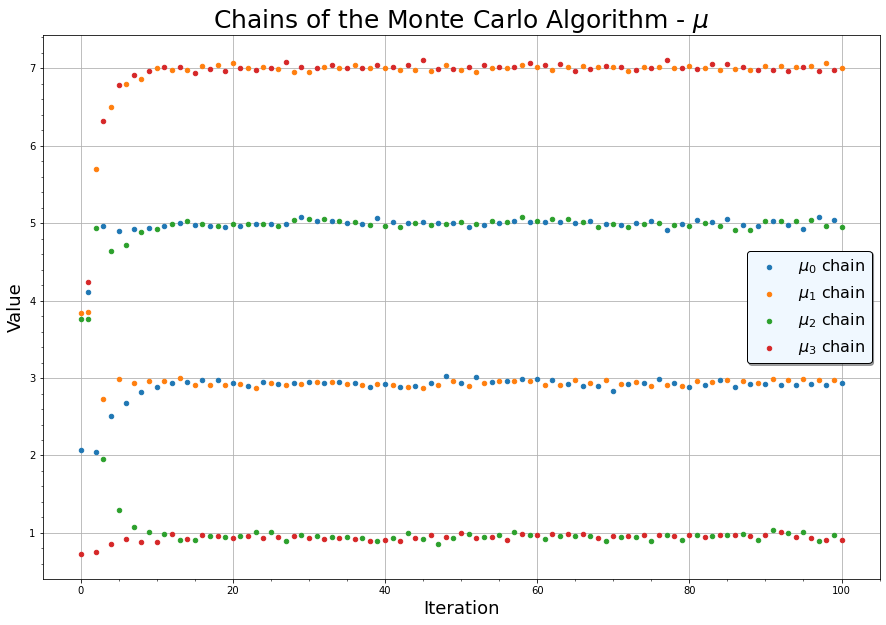

In [63]:
#Plotting the chains results

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

for i in range(k):
    ax.scatter(x = np.arange(len(mu_k_list)), y = mu_k_list[:,i], s=20, zorder = 2, label = f'$\mu_{i}$ chain')

ax.grid(zorder = 1)
ax.minorticks_on()

#ax.axvline(x = 30, color = 'black', linestyle = '--', zorder = 3, label = 'burn-in')
ax.set_title('Chains of the Monte Carlo Algorithm - $ \mu $', fontsize = 25)
ax.set_ylabel('Value', fontsize = 18)
ax.set_xlabel('Iteration', fontsize = 18)
ax.legend(facecolor = 'aliceblue', shadow = True, edgecolor = 'black', fontsize = 16)

plt.show()

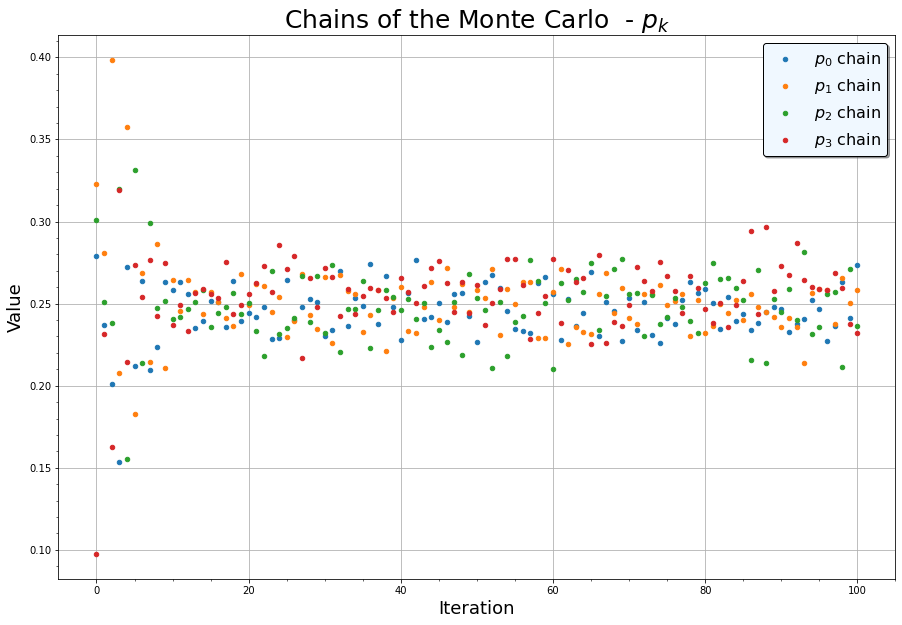

In [64]:
#Plotting the chains results

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

for i in range(k):
    ax.scatter(x = np.arange(len(p_k_list)), y = p_k_list[:,i], s=20, zorder = 2, label = f'$ p_{i}$ chain')


ax.grid(zorder = 1)
ax.minorticks_on()

#ax.axvline(x = 30, color = 'black', linestyle = '--', zorder = 3, label = 'burn-in')
ax.set_title('Chains of the Monte Carlo  - $p_k$', fontsize = 25)
ax.set_ylabel('Value', fontsize = 18)
ax.set_xlabel('Iteration', fontsize = 18)
ax.legend(facecolor = 'aliceblue', shadow = True, edgecolor = 'black', fontsize = 16)

plt.show()

In [65]:
np.sum(p_k_list[-1])
mu_k_list[-1]

array([2.937695  , 7.00428419, 4.94778312, 0.90639568])

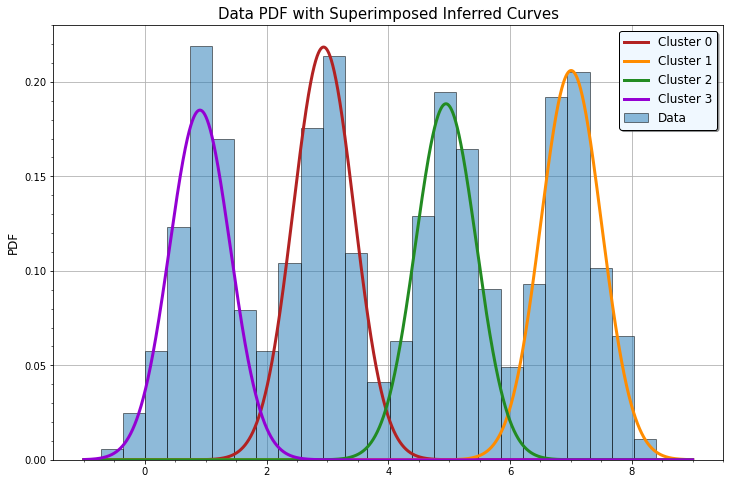

In [66]:
# Visualizing the data

x_axis = np.linspace(-1, 9, 10000)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.hist(data, bins=np.arange(np.min(data) - 0.2 , np.max(data) + 0.2 , 0.365), 
        density=True, alpha = 0.5, edgecolor='black', zorder = 2, label='Data')
ax.grid(zorder = 1)
ax.minorticks_on()
ax.set_title('Data PDF with Superimposed Inferred Curves', fontsize = 15)
ax.set_ylabel('PDF', fontsize = 12)

colors = ['firebrick', 'darkorange', 'forestgreen', 'darkviolet']
for i in range(k):
    ax.plot(x_axis, p_k_list[-1][i]*norm.pdf(x_axis, loc=mu_k_list[-1][i], scale=0.5), color = colors[i], 
            zorder = 3, label = f'Cluster {i}', linewidth = 3)

ax.legend(facecolor = 'aliceblue', shadow = True, edgecolor = 'black', fontsize = 12)